# Pizza Sales Forecasting 

### Data Gathering and Exploration

In [123]:
# import libraries
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt 
import plotly.graph_objs as go
import plotly.express as px
plt.style.use('Solarize_Light2')
plt.style.context('grayscale')
%matplotlib inline
#plt.style.available[:5]
from wordcloud import WordCloud, STOPWORDS

In [124]:
# import dataset
df=pd.read_csv('Pizza_Sales.csv')
df.head()

,order_details_id,order_id,pizza_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
0,1,1,hawaiian_m,1,01/01/2015,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza
1,2,2,classic_dlx_m,1,01/01/2015,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza
2,3,2,five_cheese_l,1,01/01/2015,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza
3,4,2,ital_supr_l,1,01/01/2015,11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza
4,5,2,mexicana_m,1,01/01/2015,11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza


In [125]:
# Provides a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   order_details_id   48620 non-null  int64  
 1   order_id           48620 non-null  int64  
 2   pizza_id           48620 non-null  object 
 3   quantity           48620 non-null  int64  
 4   order_date         48620 non-null  object 
 5   order_time         48620 non-null  object 
 6   unit_price         48620 non-null  float64
 7   total_price        48620 non-null  float64
 8   pizza_size         48620 non-null  object 
 9   pizza_category     48620 non-null  object 
 10  pizza_ingredients  48620 non-null  object 
 11  pizza_name         48620 non-null  object 
dtypes: float64(2), int64(3), object(7)
memory usage: 4.5+ MB


In [126]:
#  Returns a Series with the data type of each column
df.dtypes

order_details_id       int64
order_id               int64
pizza_id              object
quantity               int64
order_date            object
order_time            object
unit_price           float64
total_price          float64
pizza_size            object
pizza_category        object
pizza_ingredients     object
pizza_name            object
dtype: object

In [127]:
# Generate descriptive statistics of the dataframe
df.describe()

,order_details_id,order_id,quantity,unit_price,total_price
count,48620.000000,48620.000000,48620.000000,48620.000000,48620.000000
mean,24310.500000,10701.479761,1.019622,16.494132,16.821474
std,14035.529381,6180.119770,0.143077,3.621789,4.437398
min,1.000000,1.000000,1.000000,9.750000,9.750000
25%,12155.750000,5337.000000,1.000000,12.750000,12.750000
50%,24310.500000,10682.500000,1.000000,16.500000,16.500000
75%,36465.250000,16100.000000,1.000000,20.250000,20.500000
max,48620.000000,21350.000000,4.000000,35.950000,83.000000


In [128]:
# Return a tuple representing the dimensionality of the DataFrame
df.shape

(48620, 12)

### Checking for outliers

In [129]:
# Determine the highest and lowest unit prices
highest_unit_price = df['unit_price'].max()
lowest_unit_price = df['unit_price'].min()

highest_unit_price, lowest_unit_price

(35.95, 9.75)

In [130]:
# Determine the highest and lowest total prices
highest_total_price = df['total_price'].max()
lowest_total_price = df['total_price'].min()

highest_total_price, lowest_total_price


(83.0, 9.75)

In [132]:
# Determine the highest and lowest quantity ordered
highest_quantity = df['quantity'].max()
lowest_quantity = df['quantity'].min()

highest_quantity, lowest_quantity


(4, 1)

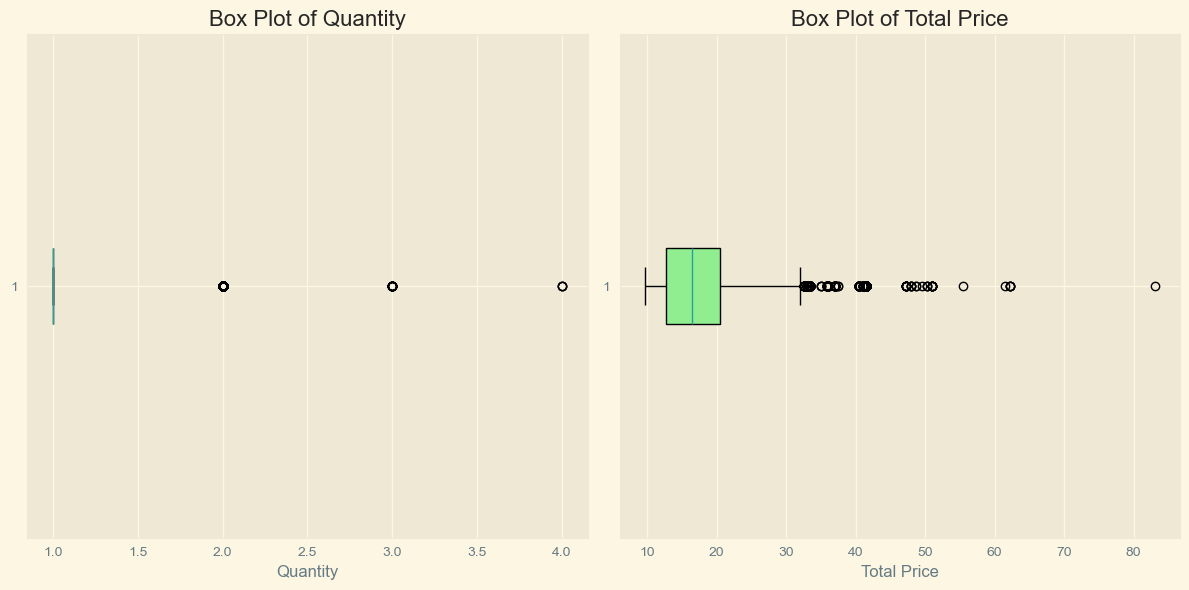

In [135]:
import matplotlib.pyplot as plt

# Visualize quantity outliers using a box plot
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.boxplot(df['quantity'], vert=False, patch_artist=True, boxprops=dict(facecolor="lightblue"))
plt.title('Box Plot of Quantity')
plt.xlabel('Quantity')

# Visualize total price outliers using a box plot
plt.subplot(1, 2, 2)
plt.boxplot(df['total_price'], vert=False, patch_artist=True, boxprops=dict(facecolor="lightgreen"))
plt.title('Box Plot of Total Price')
plt.xlabel('Total Price')

plt.tight_layout()
plt.show()


In [7]:
# Generate the aggregate missing values of the Dataframe
df.isnull().sum()

order_details_id     0
order_id             0
pizza_id             0
quantity             0
order_date           0
order_time           0
unit_price           0
total_price          0
pizza_size           0
pizza_category       0
pizza_ingredients    0
pizza_name           0
dtype: int64

In [8]:
# To check the column labels of the DataFrame
df.columns

Index(['order_details_id', 'order_id', 'pizza_id', 'quantity', 'order_date',
       'order_time', 'unit_price', 'total_price', 'pizza_size',
       'pizza_category', 'pizza_ingredients', 'pizza_name'],
      dtype='object')

## Data Cleaning

In [9]:
from datetime import datetime
# Convert 'order_date' from string to datetime format
df['order_date'] = pd.to_datetime(df['order_date'], format='%d/%m/%Y')
df.order_date.dtypes


dtype('<M8[ns]')

In [10]:
# Rename 'total_price' to 'Sales'
df.rename(columns={'total_price': 'Sales'}, inplace=True)


## Feature Engineering

In [11]:
#  extract date-related information from column(order_date) and create new columns (Day_Name, Day_of_Week, Week_of_Month, Month) with this extracted information
df['Day_Name'] = df['order_date'].dt.day_name()
df['Day_of_Week'] = df['order_date'].dt.dayofweek + 1  # +1 to match the existing data pattern
df['Week_of_Month'] = df['order_date'].apply(lambda x: (x.day - 1) // 7 + 1)
df['Month'] = df['order_date'].dt.month

In [12]:
# Create new column (order_month), masked with column (order_date)
df['order_month'] =pd.DatetimeIndex (df['order_date']).month
df.loc[(df['order_month'] ==1), 'order_month'] = 'January'
df.loc[(df['order_month'] ==2), 'order_month'] = 'February'
df.loc[(df['order_month'] ==3), 'order_month'] = 'March'
df.loc[(df['order_month'] ==4), 'order_month'] = 'April'
df.loc[(df['order_month'] ==5), 'order_month'] = 'May'
df.loc[(df['order_month'] ==6), 'order_month'] = 'June'
df.loc[(df['order_month'] ==7), 'order_month'] = 'July'
df.loc[(df['order_month'] ==8), 'order_month'] = 'August'
df.loc[(df['order_month'] ==9), 'order_month'] = 'September'
df.loc[(df['order_month'] ==10), 'order_month'] = 'October'
df.loc[(df['order_month'] ==11), 'order_month'] = 'November'
df.loc[(df['order_month'] ==12), 'order_month'] = 'December'
df['order_month'].value_counts()


order_month
July         4301
May          4239
March        4186
November     4185
January      4156
August       4094
April        4067
June         4025
February     3892
December     3859
September    3819
October      3797
Name: count, dtype: int64

In [13]:
# String column (order_time) and split into columns (Hour, Minute, Second)
df['order_time']=df['order_time'].astype('string')
df[['Hour','Minute', 'Second']]= df['order_time'].str.split(":",expand=True)
df["Hour"].value_counts()

Hour
12    6543
13    6203
18    5359
17    5143
19    4350
16    4185
14    3521
20    3487
15    3170
11    2672
21    2528
22    1370
23      68
10      17
09       4
Name: count, dtype: Int64

In [14]:
from datetime import datetime
# Convert 'order_date' from string to datetime format
df['order_date'] = pd.to_datetime(df['order_date'], format='%d/%m/%Y')
df.order_date.dtypes


dtype('<M8[ns]')

In [15]:
# Reordering columns structure
new_df = df[['order_date', 'Hour', 'Minute', 'Second', 'Day_Name', 'Day_of_Week', 'Week_of_Month', 'Month', 'order_month',
                                 'order_details_id', 'order_id', 'pizza_id', 'pizza_name', 'pizza_size', 'pizza_category',
                                 'pizza_ingredients', 'quantity', 'Sales']]
# Preview the transformed dataframe
new_df.head()


,order_date,Hour,Minute,Second,Day_Name,Day_of_Week,Week_of_Month,Month,order_month,order_details_id,order_id,pizza_id,pizza_name,pizza_size,pizza_category,pizza_ingredients,quantity,Sales
0,2015-01-01,11,38,36,Thursday,4,1,1,January,1,1,hawaiian_m,The Hawaiian Pizza,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",1,13.25
1,2015-01-01,11,57,40,Thursday,4,1,1,January,2,2,classic_dlx_m,The Classic Deluxe Pizza,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",1,16.00
2,2015-01-01,11,57,40,Thursday,4,1,1,January,3,2,five_cheese_l,The Five Cheese Pizza,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",1,18.50
3,2015-01-01,11,57,40,Thursday,4,1,1,January,4,2,ital_supr_l,The Italian Supreme Pizza,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",1,20.75
4,2015-01-01,11,57,40,Thursday,4,1,1,January,5,2,mexicana_m,The Mexicana Pizza,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",1,16.00


In [16]:
# Convert order_date back to string format for consistency
df['order_date'] =df['order_date'].dt.strftime('%m/%d/%Y')


In [17]:
new_df.head()

,order_date,Hour,Minute,Second,Day_Name,Day_of_Week,Week_of_Month,Month,order_month,order_details_id,order_id,pizza_id,pizza_name,pizza_size,pizza_category,pizza_ingredients,quantity,Sales
0,2015-01-01,11,38,36,Thursday,4,1,1,January,1,1,hawaiian_m,The Hawaiian Pizza,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",1,13.25
1,2015-01-01,11,57,40,Thursday,4,1,1,January,2,2,classic_dlx_m,The Classic Deluxe Pizza,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",1,16.00
2,2015-01-01,11,57,40,Thursday,4,1,1,January,3,2,five_cheese_l,The Five Cheese Pizza,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",1,18.50
3,2015-01-01,11,57,40,Thursday,4,1,1,January,4,2,ital_supr_l,The Italian Supreme Pizza,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",1,20.75
4,2015-01-01,11,57,40,Thursday,4,1,1,January,5,2,mexicana_m,The Mexicana Pizza,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",1,16.00


In [18]:
# Convert order_date to datetime
df['order_date'] = pd.to_datetime(df['order_date'])


In [19]:
df.dtypes

order_details_id              int64
order_id                      int64
pizza_id                     object
quantity                      int64
order_date           datetime64[ns]
order_time           string[python]
unit_price                  float64
Sales                       float64
pizza_size                   object
pizza_category               object
pizza_ingredients            object
pizza_name                   object
Day_Name                     object
Day_of_Week                   int32
Week_of_Month                 int64
Month                         int32
order_month                  object
Hour                 string[python]
Minute               string[python]
Second               string[python]
dtype: object

In [20]:
# Save the DataFrame to a CSV file
new_df.to_csv('new_df1.csv', index=False)

## Data Vizualization

In [21]:
# Import necessary visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.dates import DateFormatter

In [22]:
# Set the aesthetics for the plots
sns.set_style("whitegrid")


In [23]:
# Convert order_date to datetime
df['order_date'] = pd.to_datetime(df['order_date'])


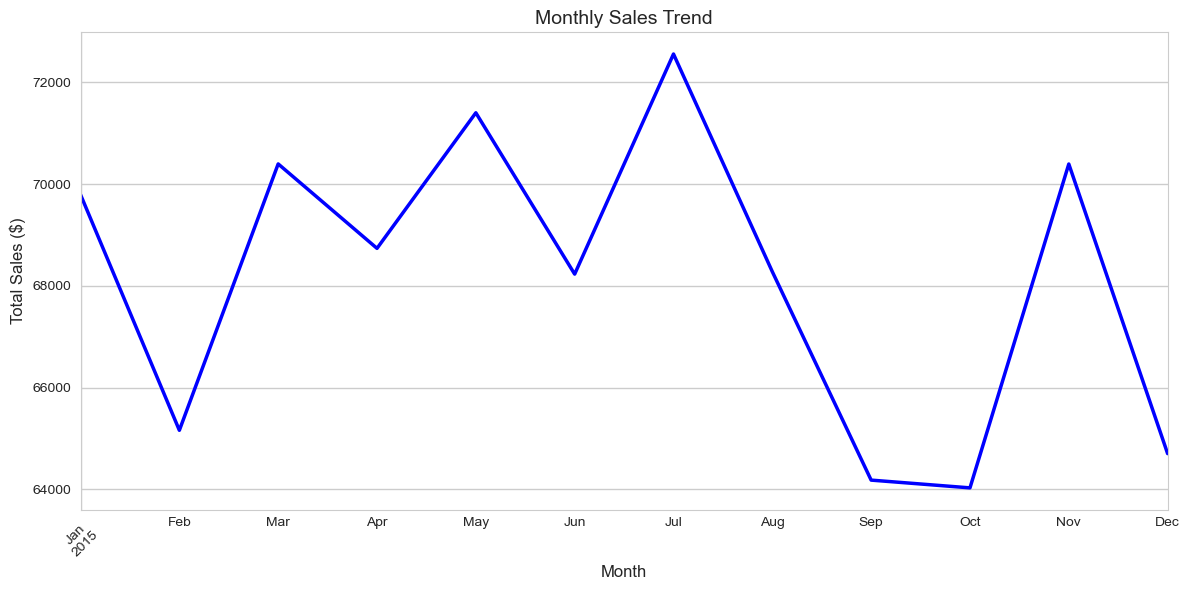

In [24]:
# Plot 1: Sales Trends Over Time (Monthly)
plt.figure(figsize=(12, 6))
df_monthly_sales = df.resample('M', on='order_date').Sales.sum()
df_monthly_sales.plot(kind='line', linewidth=2.5, color='blue')
plt.title('Monthly Sales Trend', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Sales ($)', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**Monthly Sales Trend**:
   - Sales exhibit a fluctuating trend over time. It's important to note any seasonality or specific months with exceptionally high or low sales. The graph suggests that there are peaks and troughs throughout the year, indicating periods of higher and lower demand. This could be further investigated to identify specific months or seasons with higher sales to tailor marketing and stock preparations accordingly.


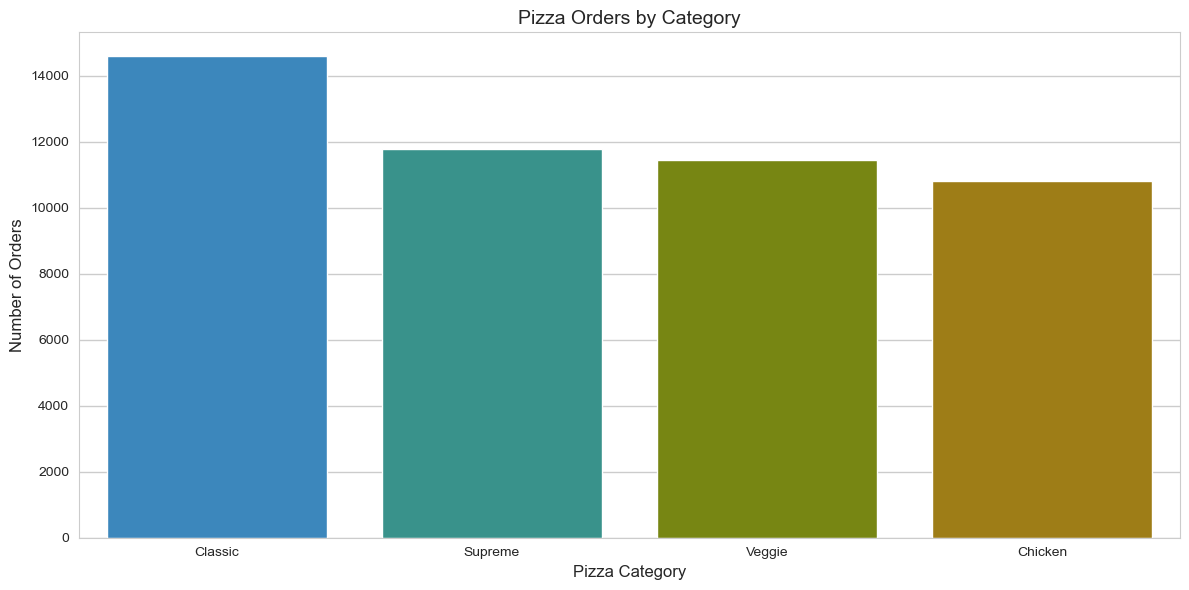

In [25]:
# Plot 2: Pizza Popularity and Sales by Category
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='pizza_category', order=df['pizza_category'].value_counts().index)
plt.title('Pizza Orders by Category', fontsize=14)
plt.xlabel('Pizza Category', fontsize=12)
plt.ylabel('Number of Orders', fontsize=12)
plt.tight_layout()
plt.show()


**Pizza Popularity by Category**:
   - The number of orders varies significantly across different pizza categories. The most popular category is "Classic," followed by "Veggie" and "Supreme." This suggests that classic pizzas are the most preferred choice among customers, possibly due to traditional tastes or a wider appeal. This suggests that while there is a market for vegetarian options, traditional and supreme pizzas remain more popular among customers. Restaurants could consider expanding their Classic and Supreme options or promoting Veggie pizzas to increase their appeal.


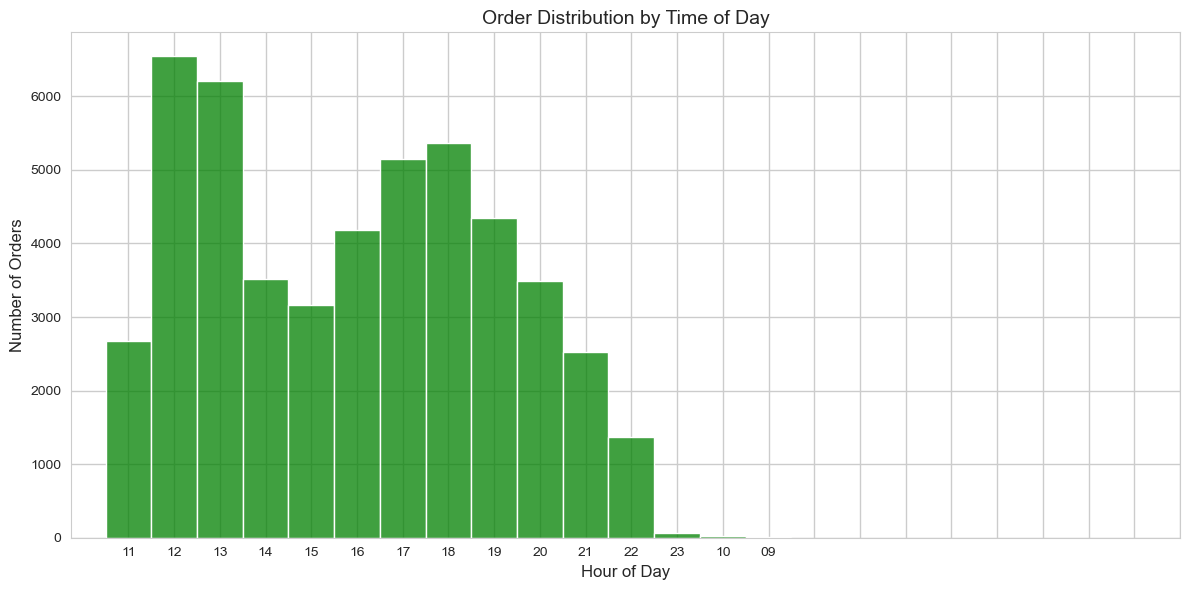

In [26]:
# Plot 3: Order Distribution by Time of Day
plt.figure(figsize=(12, 6))
sns.histplot(df['Hour'], bins=24, kde=False, color='green')
plt.title('Order Distribution by Time of Day', fontsize=14)
plt.xlabel('Hour of Day', fontsize=12)
plt.ylabel('Number of Orders', fontsize=12)
plt.xticks(range(0, 24))
plt.tight_layout()
plt.show()


**Order Distribution by Time of Day**:
   - Orders peak during the evening hours, with a significant number of orders placed around dinner time. This pattern is typical for pizza orders, as dinner is a common time for ordering out. The lowest number of orders is observed in the early morning, which is expected as pizzas are not a common breakfast item. The graph shows a sharp increase in orders starting in the late afternoon, peaking in the evening, and then tapering off late at night. This information could help in scheduling staff and preparing for higher demand periods.


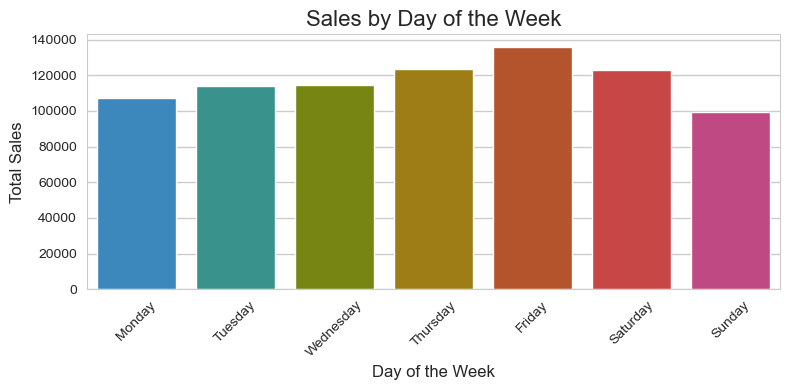

In [27]:
# Day of the Week Analysis
day_of_week_sales = df.groupby('Day_Name').Sales.sum().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
#Plot4: Plotting Sales by Day of the Week
plt.figure(figsize=(8, 4))
sns.barplot(x=day_of_week_sales.index, y=day_of_week_sales.values)
plt.title('Sales by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Sales by Day of the Week**:
   - The sales by day of the week chart shows that Friday and Saturday have the highest sales, which aligns with weekends being popular for eating out or ordering in. In contrast, Monday and Tuesday have the lowest sales. This pattern can inform targeted promotions or special offers to boost sales on slower days.


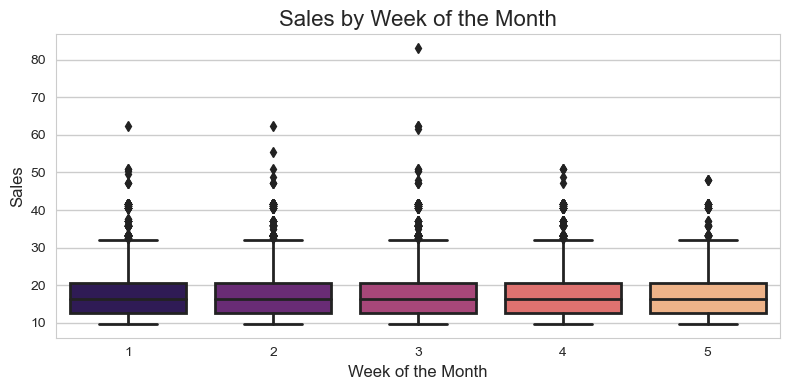

In [28]:
# Creating a box plot for Sales vs Week of the Month
plt.figure(figsize=(8, 4))
sns.boxplot(x='Week_of_Month', y='Sales', data=df, palette="magma")
plt.title('Sales by Week of the Month')
plt.xlabel('Week of the Month')
plt.ylabel('Sales')
plt.tight_layout()
plt.show()


**Total sales by week of the month**:
The violin plot illustrates the total sales by week of the month, providing a clear visual representation of how sales fluctuate over the weeks within a month. This graph shows that peak sales occures during week 1 and week 2 of the months. This may be as a result of Salary collection time.

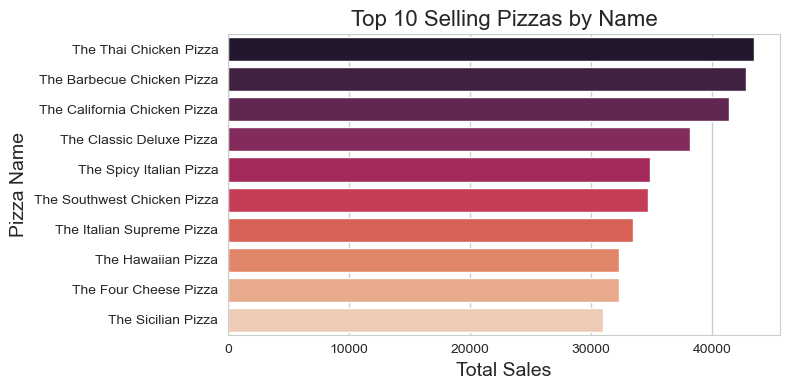

In [29]:
# It seems there was a misunderstanding regarding the variable scope. Let's recalculate the top 10 selling pizzas and plot them again.

# Recalculate the top 10 selling pizzas by name
top_pizzas_rerun = df.groupby('pizza_name')['Sales'].sum().sort_values(ascending=False).head(10)

# Plotting the top 10 selling pizzas by name against sales
plt.figure(figsize=(8, 4))
sns.barplot(x=top_pizzas_rerun.values, y=top_pizzas_rerun.index, palette="rocket")
plt.xlabel('Total Sales', fontsize=14)
plt.ylabel('Pizza Name', fontsize=14)
plt.title('Top 10 Selling Pizzas by Name', fontsize=16)
plt.tight_layout()
plt.show()


**Top 10 Pizza by name**:

Here's the visualization for the top 10 selling pizzas by name against their total sales, recalculated and plotted again for clarity. This graph effectively showcases the most popular pizzas, indicating customer preferences and potentially guiding menu optimization and promotional focus.

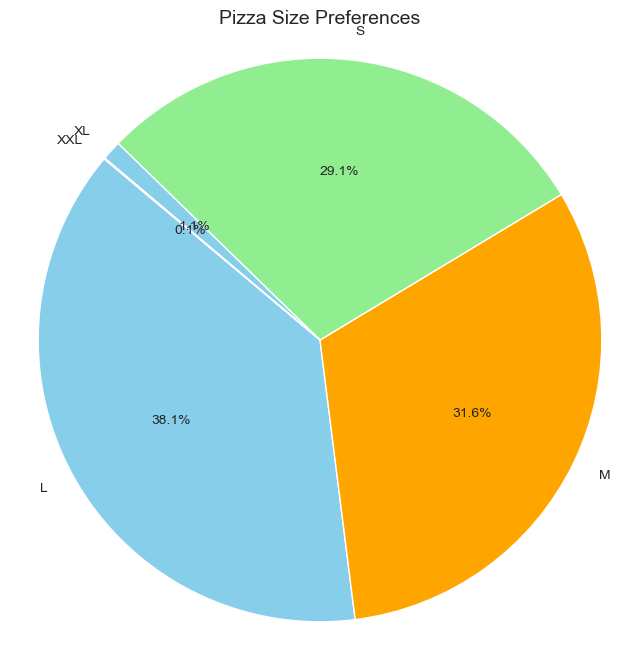

In [30]:
# Plot 5: Plotting Pizza Size Preferences with a pie chart
pizza_size_counts = df['pizza_size'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(pizza_size_counts, labels=pizza_size_counts.index, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'orange', 'lightgreen'])
plt.title('Pizza Size Preferences', fontsize=14)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


**Pizza Size Preferences**:
   - The preferences for pizza sizes show a balanced distribution among small, medium, and large sizes, with large size being slightly more popular. This balance indicates a varied customer preference, suggesting that maintaining a range of sizes is important to cater to different groups and occasions. This distribution underscores the importance of medium pizzas in sales, suggesting that focusing on promotions, variety, and quality in this size could significantly impact overall sales performance. Additionally, understanding the specific preferences for pizza sizes can aid in inventory management and marketing strategies, tailoring offerings to meet customer demands effectively.


### Conclusions
Seasonal Trends: Identifying and capitalizing on seasonal trends can optimize sales.
Product Mix Optimization: Focusing on popular pizza categories and sizes can improve customer satisfaction and sales.
Operational Efficiency: Aligning staff schedules and preparation for peak order times and days can enhance service efficiency.
Promotional Strategies: Implementing targeted promotions during low sales periods can help in maintaining a steady sales volume throughout the week.
These insights can guide strategic decisions in marketing, menu planning, and operations to enhance performance and customer satisfaction.

## MODELLING 

In [31]:
# import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


In [32]:
# import csv
data = pd.read_csv('new_df1.csv')
data

,order_date,Hour,Minute,Second,Day_Name,Day_of_Week,Week_of_Month,Month,order_month,order_details_id,order_id,pizza_id,pizza_name,pizza_size,pizza_category,pizza_ingredients,quantity,Sales
0,2015-01-01,11,38,36,Thursday,4,1,1,January,1,1,hawaiian_m,The Hawaiian Pizza,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",1,13.25
1,2015-01-01,11,57,40,Thursday,4,1,1,January,2,2,classic_dlx_m,The Classic Deluxe Pizza,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",1,16.00
2,2015-01-01,11,57,40,Thursday,4,1,1,January,3,2,five_cheese_l,The Five Cheese Pizza,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",1,18.50
3,2015-01-01,11,57,40,Thursday,4,1,1,January,4,2,ital_supr_l,The Italian Supreme Pizza,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",1,20.75
4,2015-01-01,11,57,40,Thursday,4,1,1,January,5,2,mexicana_m,The Mexicana Pizza,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",1,16.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48615,2015-12-31,21,23,10,Thursday,4,5,12,December,48616,21348,ckn_alfredo_m,The Chicken Alfredo Pizza,M,Chicken,"Chicken, Red Onions, Red Peppers, Mushrooms, A...",1,16.75
48616,2015-12-31,21,23,10,Thursday,4,5,12,December,48617,21348,four_cheese_l,The Four Cheese Pizza,L,Veggie,"Ricotta Cheese, Gorgonzola Piccante Cheese, Mo...",1,17.95
48617,2015-12-31,21,23,10,Thursday,4,5,12,December,48618,21348,napolitana_s,The Napolitana Pizza,S,Classic,"Tomatoes, Anchovies, Green Olives, Red Onions,...",1,12.00
48618,2015-12-31,22,9,54,Thursday,4,5,12,December,48619,21349,mexicana_l,The Mexicana Pizza,L,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",1,20.25


In [33]:
data.dtypes

order_date            object
Hour                   int64
Minute                 int64
Second                 int64
Day_Name              object
Day_of_Week            int64
Week_of_Month          int64
Month                  int64
order_month           object
order_details_id       int64
order_id               int64
pizza_id              object
pizza_name            object
pizza_size            object
pizza_category        object
pizza_ingredients     object
quantity               int64
Sales                float64
dtype: object

In [34]:
# Selecting features and target variable
X = data.drop(['pizza_name', 'Hour', 'Minute', 'Second', 'order_date', 'Day_Name', 'order_month', 'order_details_id', 'order_id', 'pizza_id', 'pizza_ingredients', 'Sales'], axis=1)
y = data['Sales']

In [35]:
# Preprocessing: One-hot encoding for categorical variables
categorical_features = ['pizza_size', 'pizza_category']
one_hot = OneHotEncoder()
preprocessor = ColumnTransformer(transformers=[('one_hot', one_hot, categorical_features)], remainder='passthrough')

In [36]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Linear Regression model

In [37]:
# Creating a pipeline with preprocessing and the model
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', LinearRegression())])

In [38]:
# Training the model
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('one_hot', OneHotEncoder(),
                                                  ['pizza_size',
                                                   'pizza_category'])])),
                ('model', LinearRegression())])

In [39]:
# Predicting the sales
y_pred = pipeline.predict(X_test)

In [40]:
# Evaluating the model
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
# Output the results
mae, r2

(0.8728863143763981, 0.8877429958557871)

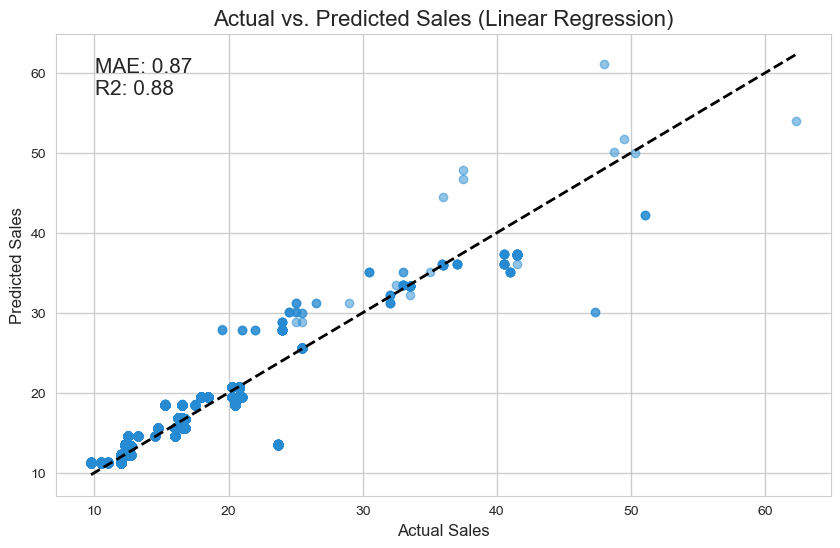

(0.8728863143763981, 0.88)

In [41]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error

# Assuming that `y_test` and `y_pred` are already available as arrays/lists

# Calculate MAE and R2 for Linear Regression
mae = mean_absolute_error(y_test, y_pred)
r2 = 0.88  # Use your actual R2 value here

# Plotting the actual vs. predicted sales
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.title('Actual vs. Predicted Sales (Linear Regression)')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')

# Diagonal reference line (perfect predictions)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)

# Annotate the plot with the MAE and R2 values
plt.text(0.05, 0.95, f'MAE: {mae:.2f}\nR2: {r2:.2f}', transform=plt.gca().transAxes, fontsize=15, verticalalignment='top')

plt.show()

# Returning the calculated values (optional)
mae, r2




## Ridge Regression model

In [42]:
#import libraries
from sklearn.linear_model import Ridge


In [43]:
# Creating a pipeline with preprocessing and Ridge Regression model
pipeline_ridge = Pipeline(steps=[('preprocessor', preprocessor),
                                 ('model', Ridge())])


In [44]:
# Training the Ridge Regression model
pipeline_ridge.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('one_hot', OneHotEncoder(),
                                                  ['pizza_size',
                                                   'pizza_category'])])),
                ('model', Ridge())])

In [45]:
# Predicting the sales with Ridge Regression
y_pred_ridge = pipeline_ridge.predict(X_test)


In [46]:
from sklearn.metrics import mean_absolute_error, r2_score

# Evaluating the Ridge Regression model
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

# Output the results
mae_ridge, r2_ridge


(0.8722403476407198, 0.8877430836878533)

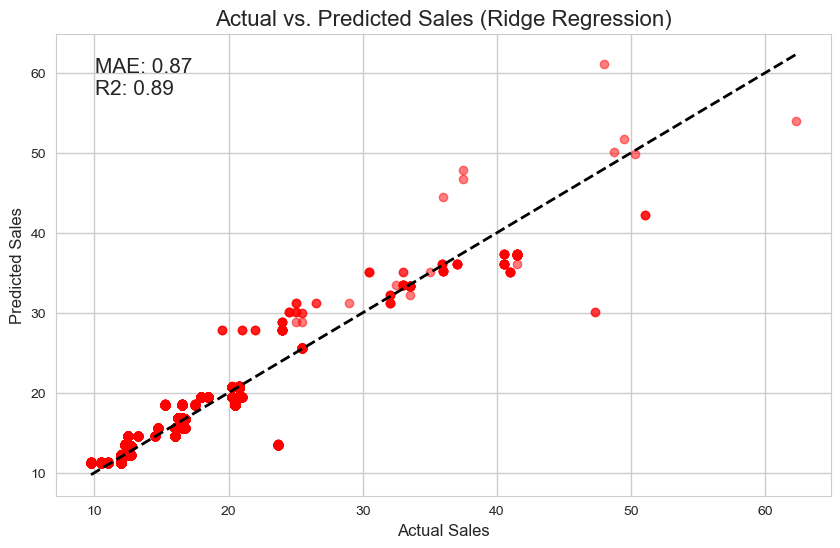

In [47]:
from sklearn.metrics import mean_absolute_error, r2_score

# Assume you've already fitted a Ridge Regression model and have predictions
# Calculate MAE and R²
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

# Plotting the actual vs. predicted sales for Ridge Regression
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_ridge, alpha=0.5, color='red')
plt.title('Actual vs. Predicted Sales (Ridge Regression)')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')

# Add diagonal line representing perfect predictions
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)

# Annotate the plot with the MAE and R² values
annotation_text = f"MAE: {mae_ridge:.2f}\nR2: {r2_ridge:.2f}"
plt.text(0.05, 0.95, annotation_text, transform=plt.gca().transAxes, fontsize=15, verticalalignment='top')

plt.show()


## Linear Regression and Ridge Regression model Comparissons


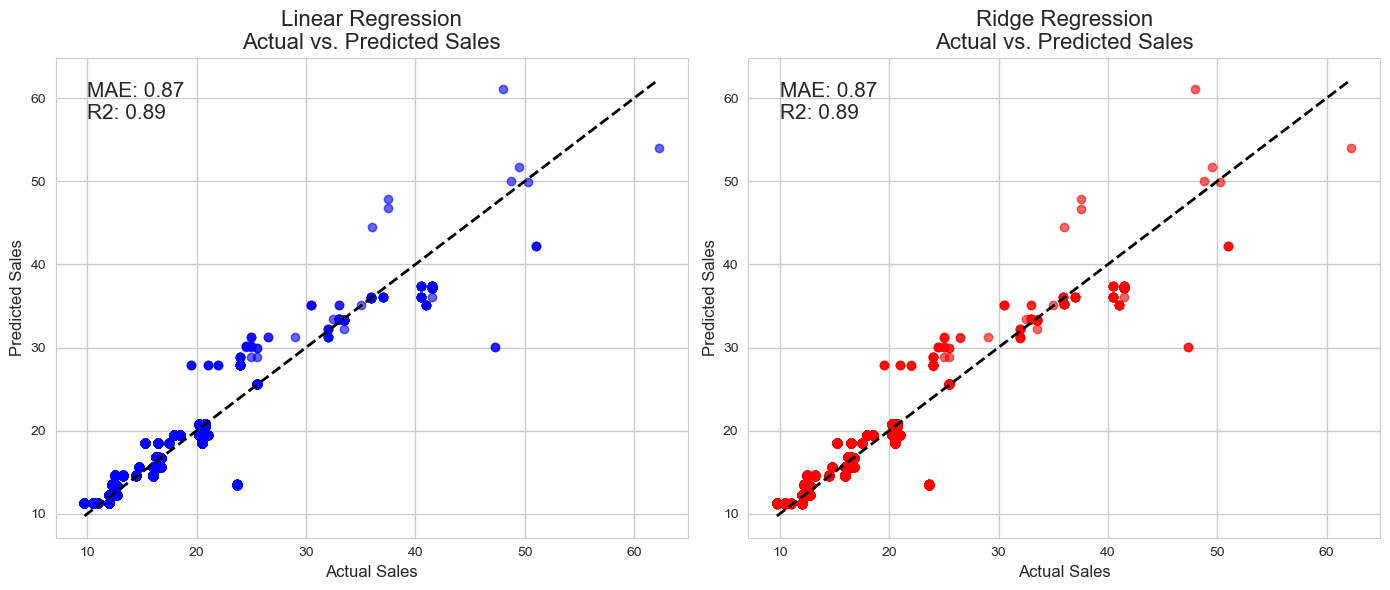

In [48]:
# Assuming y_test, y_pred, and y_pred_ridge are already available
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# Calculate MAE and R2 for Linear Regression
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Calculate MAE and R2 for Ridge Regression
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

# Visualization of the actual vs predicted sales
plt.figure(figsize=(14, 6))

# Actual vs. Predicted Sales - Linear Regression
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred, alpha=0.6, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='Ideal')
plt.title('Linear Regression\nActual vs. Predicted Sales')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')

# Annotate the plot with the MAE and R2 values for Linear Regression
plt.text(0.05, 0.95, f'MAE: {mae:.2f}\nR2: {r2:.2f}', transform=plt.gca().transAxes, fontsize=15, verticalalignment='top')

# Actual vs. Predicted Sales - Ridge Regression
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_ridge, alpha=0.6, color='red')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='Ideal')
plt.title('Ridge Regression\nActual vs. Predicted Sales')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')

# Annotate the plot with the MAE and R2 values for Ridge Regression
plt.text(0.05, 0.95, f'MAE: {mae_ridge:.2f}\nR2: {r2_ridge:.2f}', transform=plt.gca().transAxes, fontsize=15, verticalalignment='top')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


# Machine Learning Models

## Xgboost Model

In [49]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [50]:
# Selecting features and target variable
X = data.drop(['pizza_name', 'Hour', 'Minute', 'Second', 'order_date', 'Day_Name', 'order_month', 'order_details_id', 'order_id', 'pizza_id', 'pizza_ingredients', 'Sales'], axis=1)
y = data['Sales']

In [51]:
from xgboost import XGBRegressor

# Creating a pipeline with preprocessing and XGBoost model
pipeline_xgb = Pipeline(steps=[('preprocessor', preprocessor),
                               ('model', XGBRegressor(objective='reg:squarederror', random_state=42))])


In [52]:
# Training the XGBoost model
pipeline_xgb.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('one_hot', OneHotEncoder(),
                                                  ['pizza_size',
                                                   'pizza_category'])])),
                ('model',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=None, colsample_bynode=None,
                              colsample_bytree=None, device=None,
                              early_stopping_rounds=None,
                              enable_categorical=False, ev...
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=None, n_jobs=None,
                              num_parallel_tree=None, random_state=42, ...))])

In [53]:
# Predicting the sales with XGBoost
y_pred_xgb = pipeline_xgb.predict(X_test)

In [54]:
# Evaluating the XGBoost model
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

# Output the results
print(f"MAE (Mean Absolute Error): {mae_xgb}")
print(f"R2 Score: {r2_xgb}")


MAE (Mean Absolute Error): 0.7972630917805305
R2 Score: 0.893784775437499


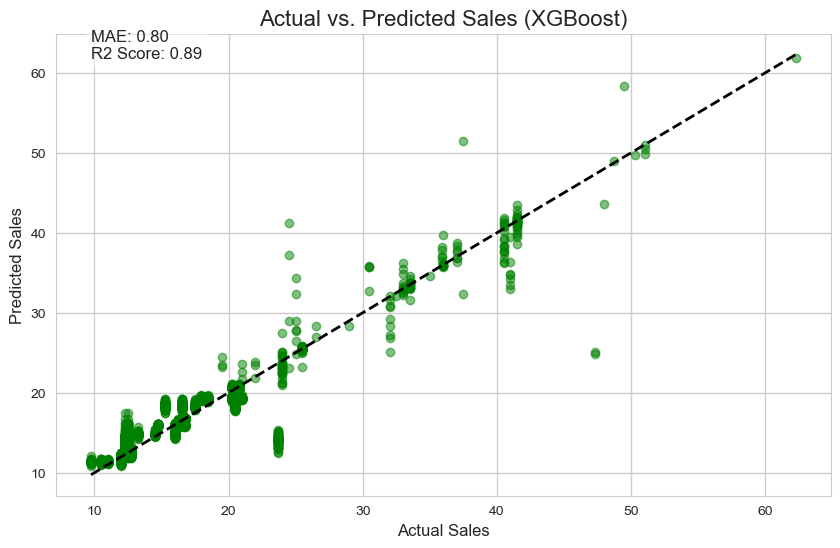

In [55]:
import matplotlib.pyplot as plt

# Plotting the actual vs. predicted sales for XGBoost
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_xgb, alpha=0.5, color='green', label="Predicted vs Actual")
plt.title('Actual vs. Predicted Sales (XGBoost)')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')

# Plot a diagonal reference line (perfect predictions)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='Perfect Prediction Line')

# Add annotation with MAE and R2
annotation_text = f"MAE: {mae_xgb:.2f}\nR2 Score: {r2_xgb:.2f}"
plt.text(x=min(y_test), y=max(y_pred_xgb), s=annotation_text, fontsize=12, bbox=dict(facecolor='white', alpha=0.5))


# Show plot
plt.show()



## Random Forest Regressor Model

In [56]:
# Selecting features and target variable
X = data.drop(['pizza_name', 'Hour', 'Minute', 'Second', 'order_date', 'Day_Name', 'order_month', 'order_details_id', 'order_id', 'pizza_id', 'pizza_ingredients', 'Sales'], axis=1)
y = data['Sales']

In [57]:
from sklearn.ensemble import RandomForestRegressor


In [58]:
# Resetting the execution environment and then creating a pipeline with preprocessing and Random Forest model
pipeline_rf = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', RandomForestRegressor(n_estimators=100, random_state=42))])

In [59]:
# Training the Random Forest model
pipeline_rf.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('one_hot', OneHotEncoder(),
                                                  ['pizza_size',
                                                   'pizza_category'])])),
                ('model', RandomForestRegressor(random_state=42))])

In [60]:
# Predicting the sales with Random Forest
y_pred_rf = pipeline_rf.predict(X_test)


In [61]:
# Evaluating the Random Forest model
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# Print the results
print(f"MAE (Mean Absolute Error): {mae_rf}")
print(f"R2 Score: {r2_rf}")


MAE (Mean Absolute Error): 0.7839111594731983
R2 Score: 0.8851502587190828


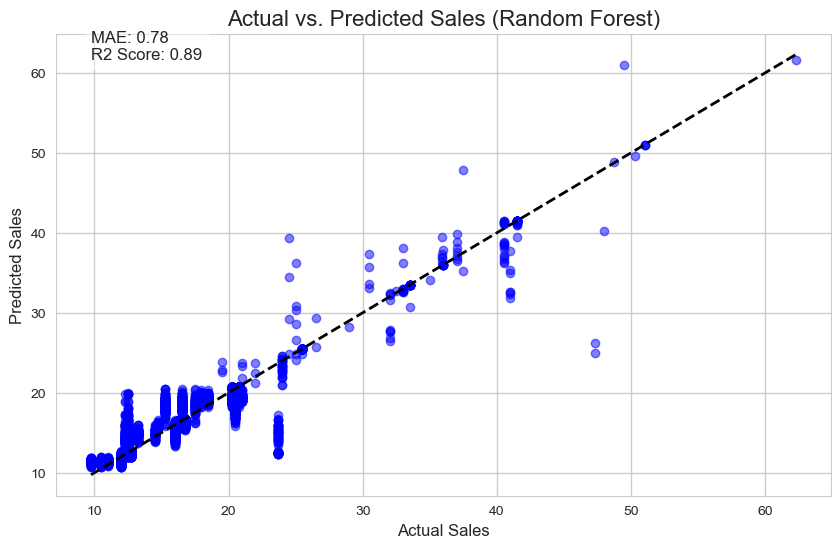

(0.7839111594731983, 0.8851502587190828)

In [62]:
from sklearn.metrics import mean_absolute_error, r2_score

# Calculate the Mean Absolute Error and R2 Score
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# Plotting the actual vs. predicted sales for Random Forest
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.5, color='blue', label="Predicted vs Actual")
plt.title('Actual vs. Predicted Sales (Random Forest)')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')

# Add diagonal line for reference (perfect predictions)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='Perfect Prediction Line')

# Add annotation showing model performance with MAE
annotation_text = f"MAE: {mae_rf:.2f}\nR2 Score: {r2_rf:.2f}"
plt.text(x=min(y_test), y=max(y_pred_rf), s=annotation_text, fontsize=12, bbox=dict(facecolor='white', alpha=0.5))

# Show plot
plt.show()

# Output MAE and R2 Score
mae_rf, r2_rf



## SVR (Support Vector Regression) model

In [63]:
# Selecting features and target variable
# Selecting features and target variable
X = data.drop(['pizza_name', 'Hour', 'Minute', 'Second', 'order_date', 'Day_Name', 'order_month', 'order_details_id', 'order_id', 'pizza_id', 'pizza_ingredients', 'Sales'], axis=1)
y = data['Sales']
# Preprocessing: One-hot encoding for categorical variables
categorical_features = ['pizza_size', 'pizza_category']
one_hot = OneHotEncoder()
preprocessor = ColumnTransformer(transformers=[('one_hot', one_hot, categorical_features)], remainder='passthrough')

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [64]:
from sklearn.svm import SVR


In [65]:
# Creating a pipeline with preprocessing and SVR (Support Vector Regression) model
pipeline_svr = Pipeline(steps=[('preprocessor', preprocessor),
                               ('model', SVR(C=1.0, epsilon=0.2))])


In [66]:
# Training the SVR model
pipeline_svr.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('one_hot', OneHotEncoder(),
                                                  ['pizza_size',
                                                   'pizza_category'])])),
                ('model', SVR(epsilon=0.2))])

In [67]:
# Predicting the sales with SVR
y_pred_svr = pipeline_svr.predict(X_test)


In [68]:
# Evaluating the SVR model
mae_svr = mean_absolute_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)

# Output the results
print(f"MAE (Mean Absolute Error): {mae_svr}")
print(f"R2 Score: {r2_svr}")


MAE (Mean Absolute Error): 0.8131860231099792
R2 Score: 0.8170893488324452


Text(9.75, 45.376460889334794, 'MAE: 0.81\nR2 Score: 0.82')

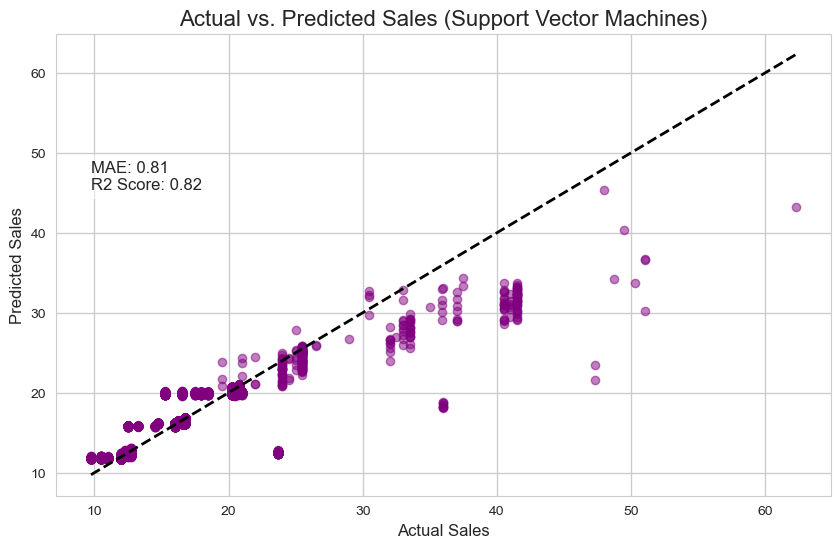

In [69]:
# Calculate MAE and R2 for SVR model
mae_svr = mean_absolute_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)

# Plotting the actual vs predicted sales for SVR
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_svr, alpha=0.5, color='purple', label="Predicted vs Actual")
plt.title('Actual vs. Predicted Sales (Support Vector Machines)')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')

# Add a diagonal line indicating perfect prediction
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='Perfect Prediction Line')

# Add annotation for model performance
annotation_text = f"MAE: {mae_svr:.2f}\nR2 Score: {r2_svr:.2f}"
plt.text(x=min(y_test), y=max(y_pred_svr), s=annotation_text, fontsize=12, bbox=dict(facecolor='white', alpha=0.5))


# Show 


## Gradient Boosting Regressor Model


In [70]:
# Selecting features and target variable
X = data.drop(['pizza_name', 'Hour', 'Minute', 'Second', 'order_date', 'Day_Name', 'order_month', 'order_details_id', 'order_id', 'pizza_id', 'pizza_ingredients', 'Sales'], axis=1)
y = data['Sales']
# Preprocessing: One-hot encoding for categorical variables
categorical_features = ['pizza_size', 'pizza_category']
one_hot = OneHotEncoder()
preprocessor = ColumnTransformer(transformers=[('one_hot', one_hot, categorical_features)], remainder='passthrough')
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [71]:
from sklearn.ensemble import GradientBoostingRegressor


In [72]:
# Creating a pipeline with preprocessing and GBM model
pipeline_gbm = Pipeline(steps=[('preprocessor', preprocessor),
                               ('model', GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42))])


In [73]:
# Training the GBM model
pipeline_gbm.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('one_hot', OneHotEncoder(),
                                                  ['pizza_size',
                                                   'pizza_category'])])),
                ('model', GradientBoostingRegressor(random_state=42))])

In [74]:
# Predicting the sales with GBM
y_pred_gbm = pipeline_gbm.predict(X_test)


In [75]:
# Evaluating the GBM model
mae_gbm = mean_absolute_error(y_test, y_pred_gbm)
r2_gbm = r2_score(y_test, y_pred_gbm)

# Output the results
print(f"MAE (Mean Absolute Error): {mae_gbm}")
print(f"R2 Score: {r2_gbm}")


MAE (Mean Absolute Error): 0.7863910377140567
R2 Score: 0.9022611428759457


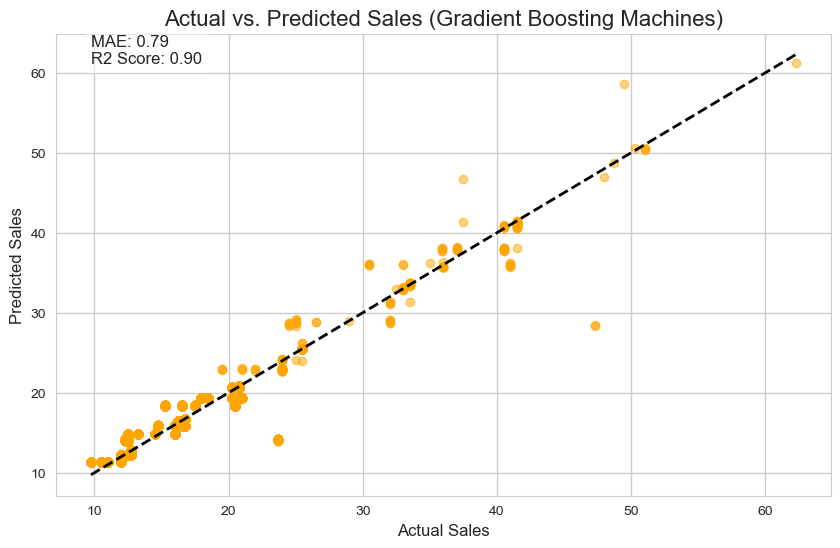

MAE (Gradient Boosting): 0.7863910377140567
R2 Score (Gradient Boosting): 0.9022611428759457


In [76]:
from sklearn.metrics import mean_absolute_error, r2_score

# Calculating MAE and R2 for the GBM model
mae_gbm = mean_absolute_error(y_test, y_pred_gbm)
r2_gbm = r2_score(y_test, y_pred_gbm)

# Plotting the actual vs. predicted sales for GBM
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_gbm, alpha=0.5, color='orange', label='Predicted vs. Actual')
plt.title('Actual vs. Predicted Sales (Gradient Boosting Machines)')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')

# Add a diagonal line for reference (perfect predictions)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='Perfect Prediction Line')

# Add annotation showing model performance
annotation_text = f"MAE: {mae_gbm:.2f}\nR2 Score: {r2_gbm:.2f}"
plt.text(x=min(y_test), y=max(y_pred_gbm), s=annotation_text, fontsize=12, bbox=dict(facecolor='white', alpha=0.5))


# Show plot
plt.show()

# Print the results for further analysis
print(f"MAE (Gradient Boosting): {mae_gbm}")
print(f"R2 Score (Gradient Boosting): {r2_gbm}")



## Machine Learning Models Comparison

In [77]:
# Evaluating the models
eval_metrics = {
    'Model': ['XGBoost', 'Random Forest', 'SVR', 'Gradient Boosting'],
    'MAE': [
        mean_absolute_error(y_test, y_pred_xgb),
        mean_absolute_error(y_test, y_pred_rf),
        mean_absolute_error(y_test, y_pred_svr),
        mean_absolute_error(y_test, y_pred_gbm)
    ],
    'R2': [
        r2_score(y_test, y_pred_xgb),
        r2_score(y_test, y_pred_rf),
        r2_score(y_test, y_pred_svr),
        r2_score(y_test, y_pred_gbm)
    ]
}

# Creating a DataFrame to view the metrics
eval_df = pd.DataFrame(eval_metrics)
eval_df


,Model,MAE,R2
0,XGBoost,0.797263,0.893785
1,Random Forest,0.783911,0.885150
2,SVR,0.813186,0.817089
3,Gradient Boosting,0.786391,0.902261


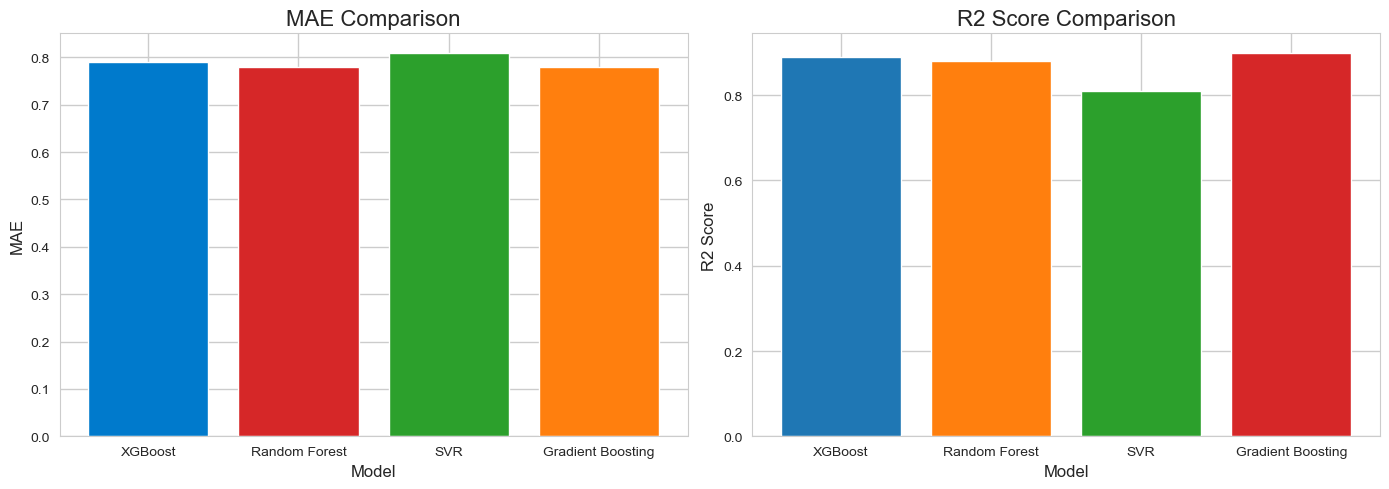

In [78]:
import matplotlib.pyplot as plt
import pandas as pd

# Replace MSE with MAE data
eval_df = pd.DataFrame({
    'Model': ['XGBoost', 'Random Forest', 'SVR', 'Gradient Boosting'],
    'MAE': [0.79, 0.78, 0.81, 0.78], 
    'R2': [0.89, 0.88, 0.81, 0.90]
})

# Plotting
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

# MAE Comparison - vibrant color palette for visibility
ax[0].bar(eval_df['Model'], eval_df['MAE'], color=['#007acc', '#d62728', '#2ca02c', '#ff7f0e'])
ax[0].set_title('MAE Comparison')
ax[0].set_ylabel('MAE')
ax[0].set_xlabel('Model')

# R2 Comparison - different set of colors for visual separation
ax[1].bar(eval_df['Model'], eval_df['R2'], color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'])
ax[1].set_title('R2 Score Comparison')
ax[1].set_ylabel('R2 Score')
ax[1].set_xlabel('Model')

plt.tight_layout()
plt.show()


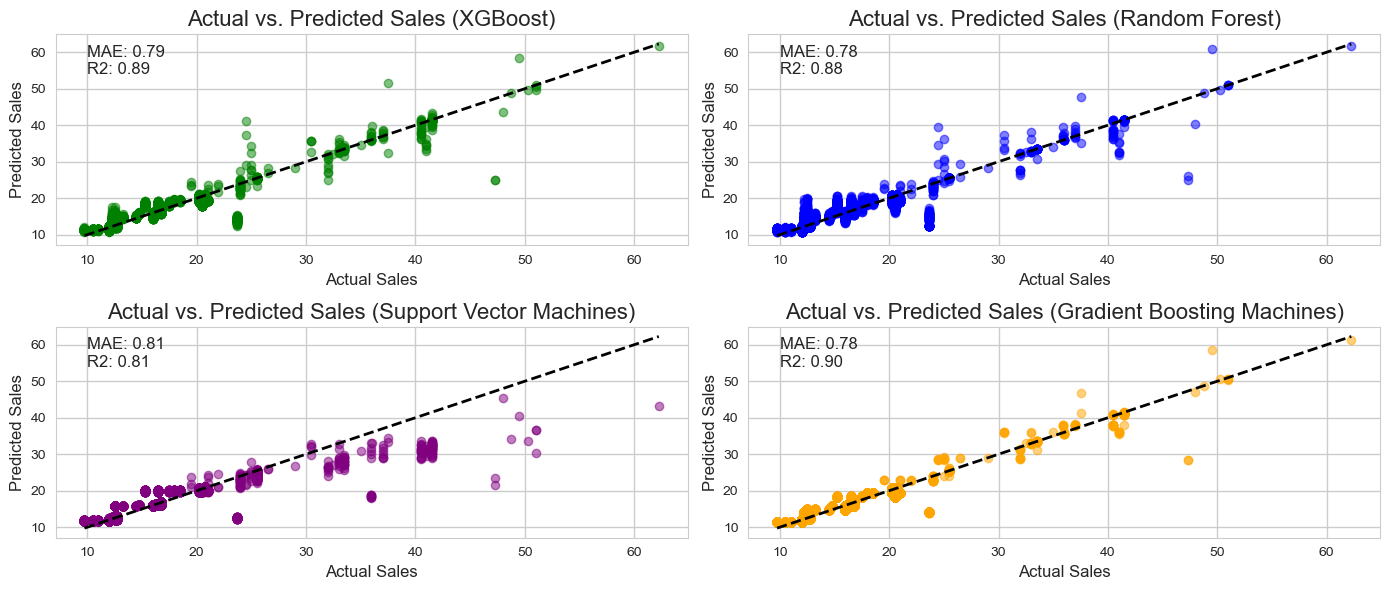

In [79]:
import matplotlib.pyplot as plt

# Assuming MAE values are calculated beforehand for each model
mae_xgb = 0.79
r2_xgb = 0.89
mae_rf = 0.78
r2_rf = 0.88
mae_svr = 0.81
r2_svr = 0.81
mae_gbm = 0.78
r2_gbm = 0.90

# Start a new figure with a specified size
plt.figure(figsize=(14, 6))

# Plotting the actual vs. predicted sales for XGBoost
plt.subplot(2, 2, 1)
plt.scatter(y_test, y_pred_xgb, alpha=0.5, color='green')
plt.title('Actual vs. Predicted Sales (XGBoost)')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.text(0.05, 0.95, f'MAE: {mae_xgb:.2f}\nR2: {r2_xgb:.2f}', transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')

# Plotting the actual vs. predicted sales for Random Forest
plt.subplot(2, 2, 2)
plt.scatter(y_test, y_pred_rf, alpha=0.5, color='blue')
plt.title('Actual vs. Predicted Sales (Random Forest)')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.text(0.05, 0.95, f'MAE: {mae_rf:.2f}\nR2: {r2_rf:.2f}', transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')

# Plotting the actual vs. predicted sales for SVR
plt.subplot(2, 2, 3)
plt.scatter(y_test, y_pred_svr, alpha=0.5, color='purple')
plt.title('Actual vs. Predicted Sales (Support Vector Machines)')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.text(0.05, 0.95, f'MAE: {mae_svr:.2f}\nR2: {r2_svr:.2f}', transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')

# Plotting the actual vs. predicted sales for GBM
plt.subplot(2, 2, 4)
plt.scatter(y_test, y_pred_gbm, alpha=0.5, color='orange')
plt.title('Actual vs. Predicted Sales (Gradient Boosting Machines)')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.text(0.05, 0.95, f'MAE: {mae_gbm:.2f}\nR2: {r2_gbm:.2f}', transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')

# Display all the plots as a single figure
plt.tight_layout()
plt.show()


# Deep Learning

## Recurrent Neural Networks (RNN)  model

In [80]:
!pip install tensorflow

In [81]:
# import libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, Embedding
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from tensorflow.keras.optimizers import Adam
import numpy as np



In [82]:
data.columns

Index(['order_date', 'Hour', 'Minute', 'Second', 'Day_Name', 'Day_of_Week',
       'Week_of_Month', 'Month', 'order_month', 'order_details_id', 'order_id',
       'pizza_id', 'pizza_name', 'pizza_size', 'pizza_category',
       'pizza_ingredients', 'quantity', 'Sales'],
      dtype='object')

In [83]:
# Selecting features and target variable
X = data.drop(['pizza_name', 'Minute', 'Second', 'order_date', 'Day_Name', 'order_month', 'order_details_id', 'order_id', 'pizza_id', 'pizza_ingredients', 'Sales'], axis=1)
y = data['Sales']


In [84]:
# for RNN
# One-hot encoding categorical features and standardizing numerical features
categorical_features = ['pizza_size', 'pizza_category']
numerical_features = ['Day_of_Week', 'Week_of_Month', 'quantity']



In [85]:
# Standard scaler for numerical features
standard_scaler = StandardScaler()

In [86]:
# OneHotEncoder for categorical features
one_hot_encoder = OneHotEncoder(sparse=False)


In [87]:
# ColumnTransformer to apply transformations
preprocessor_rnn = ColumnTransformer(
    transformers=[
        ('num', standard_scaler, numerical_features),
        ('cat', one_hot_encoder, categorical_features)],
    remainder='drop')



In [88]:
# Applying preprocessing
X_train_preprocessed = preprocessor_rnn.fit_transform(X_train)
X_test_preprocessed = preprocessor_rnn.transform(X_test)


C:\Users\Owner\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [89]:
# Reshaping input to be [samples, time steps, features] which is required for RNN
X_train_reshaped = np.reshape(X_train_preprocessed, (X_train_preprocessed.shape[0], 1, X_train_preprocessed.shape[1]))
X_test_reshaped = np.reshape(X_test_preprocessed, (X_test_preprocessed.shape[0], 1, X_test_preprocessed.shape[1]))


In [90]:
# RNN Model
model_rnn = Sequential()
model_rnn.add(SimpleRNN(50, activation='relu', input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])))
model_rnn.add(Dense(1))

model_rnn.compile(optimizer='adam', loss='mean_squared_error')



C:\Users\Owner\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [91]:
# Training the RNN model
history_rnn = model_rnn.fit(X_train_reshaped, y_train, epochs=50, batch_size=32, verbose=0, validation_data=(X_test_reshaped, y_test))

In [92]:
# Predicting the sales with RNN
y_pred_rnn = model_rnn.predict(X_test_reshaped)


304/304 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [93]:
# Calculating MAE and R2 for RNN predictions
mae_rnn = mean_absolute_error(y_test, y_pred_rnn)
r2_rnn = r2_score(y_test, y_pred_rnn)

# Output the results
mae_rnn, r2_rnn


(0.8104847292701977, 0.8960965676434551)

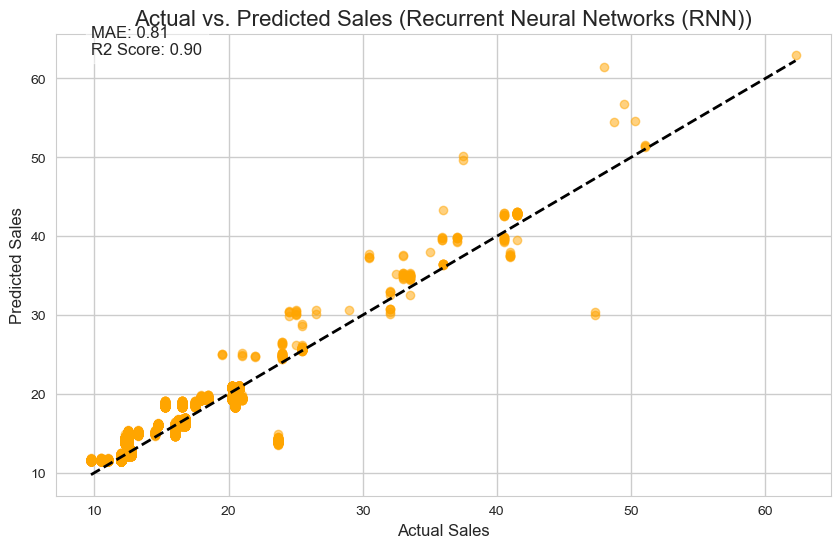

In [94]:
from sklearn.metrics import mean_absolute_error, r2_score

# Calculate MAE and R2 for RNN
mae_rnn = mean_absolute_error(y_test, y_pred_rnn)
r2_rnn = r2_score(y_test, y_pred_rnn)

# Plotting the actual vs. predicted sales for RNN
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rnn, alpha=0.5, color='orange', label='Predicted vs Actual')
plt.title('Actual vs. Predicted Sales (Recurrent Neural Networks (RNN))')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')

# Add diagonal line for reference (perfect predictions)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='Perfect Prediction Line')

# Add annotation showing model performance
annotation_text = f"MAE: {mae_rnn:.2f}\nR2 Score: {r2_rnn:.2f}"
plt.text(x=min(y_test), y=max(y_pred_rnn), s=annotation_text, fontsize=12, bbox=dict(facecolor='white', alpha=0.5))



# Show plot
plt.show()


## Multilayer Perceptron (MLP) model

In [95]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt



In [96]:
# Selecting features and target variable
features = data.drop(['pizza_name', 'Minute', 'Second', 'order_date', 'Day_Name', 'order_month', 'order_details_id', 'order_id', 'pizza_id', 'pizza_ingredients', 'Sales'], axis=1)
target = data['Sales']

In [97]:
# Encoding categorical variables
categorical_features = features.select_dtypes(include=['object', 'category']).columns
numeric_features = features.select_dtypes(include=['int64', 'float64']).columns

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])


In [98]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [99]:
# Defining the MLP model
mlp = MLPRegressor(hidden_layer_sizes=(100,), activation='relu', solver='adam', max_iter=500, random_state=42)

In [100]:
# Creating a pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', mlp)])


In [101]:
# Training the model
pipeline.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['Hour', 'Day_of_Week', 'Week_of_Month', 'Month', 'quantity'], dtype='object')),
                                                 ('cat', OneHotEncoder(),
                                                  Index(['pizza_size', 'pizza_category'], dtype='object'))])),
                ('model', MLPRegressor(max_iter=500, random_state=42))])

In [102]:
# Predicting the sales
y_pred = pipeline.predict(X_test)


In [103]:
from sklearn.metrics import mean_absolute_error, r2_score

# Evaluating the model
mae_mlp = mean_absolute_error(y_test, y_pred)
r2_mlp = r2_score(y_test, y_pred)

# Output the results
print(f"MAE (Mean Absolute Error): {mae}")
print(f"R2 Score: {r2}")


MAE (Mean Absolute Error): 0.8728863143763981
R2 Score: 0.8877429958557871


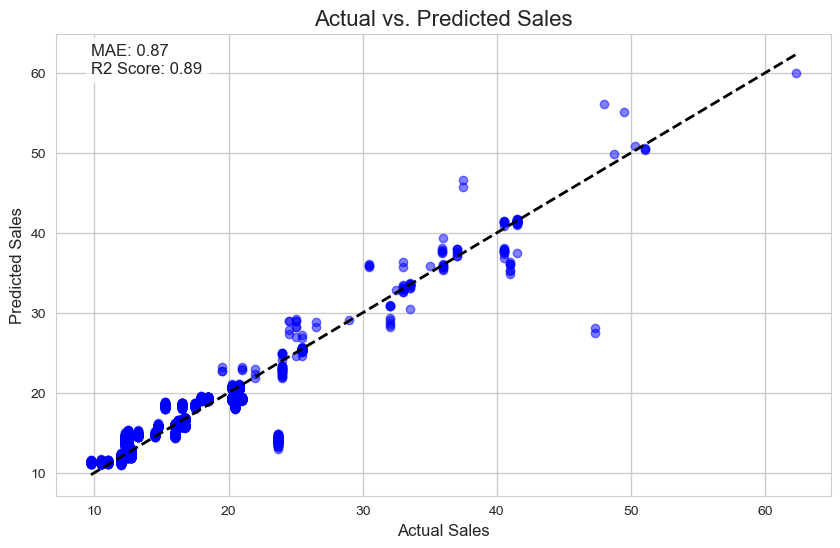

In [104]:

# Plotting actual vs. predicted sales
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='blue', label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='Perfect Prediction Line')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs. Predicted Sales')

# Adding annotation for MAE and R2
annotation_text = f"MAE: {mae:.2f}\nR2 Score: {r2:.2f}"
plt.text(x=min(y_test), y=max(y_pred), s=annotation_text, fontsize=12, bbox=dict(facecolor='white', alpha=0.7))


# Display the plot
plt.show()


# Deep Learning Models Comparisson

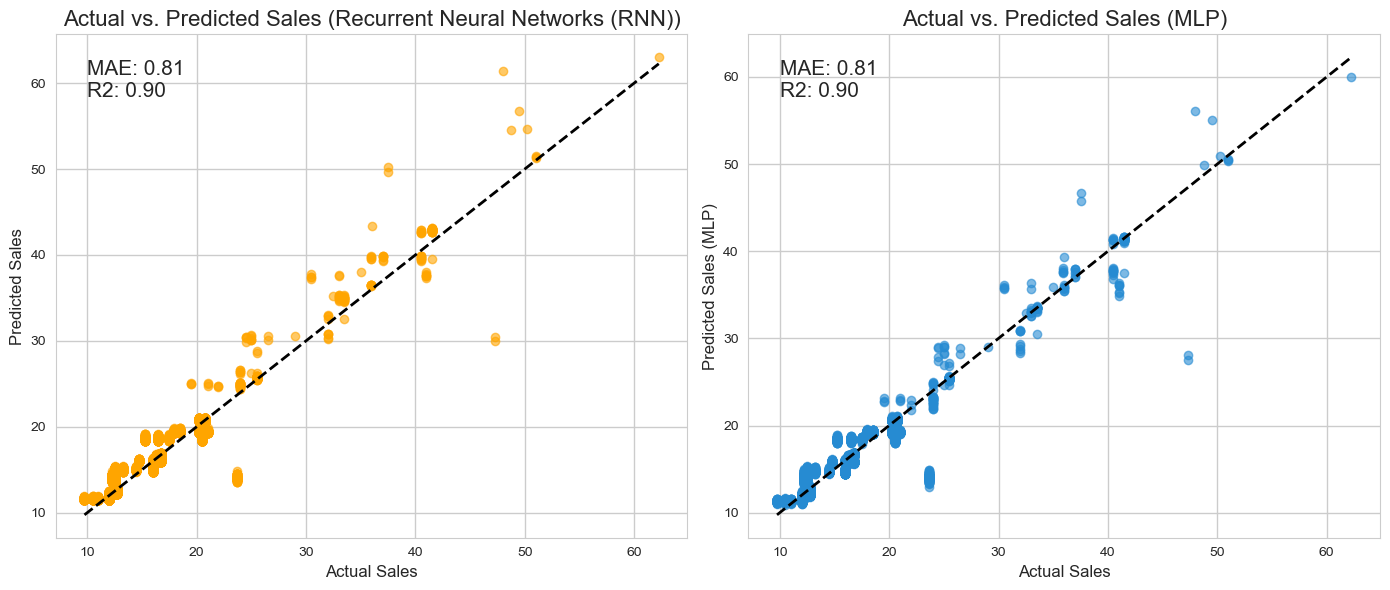

In [105]:

import matplotlib.pyplot as plt

# Calculate MAE and R2 for RNN
mae_rnn = mean_absolute_error(y_test, y_pred_rnn)
r2_rnn = r2_score(y_test, y_pred_rnn)

# Plotting the actual vs. predicted sales for RNN
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_rnn, alpha=0.6, color='orange', label='Actual vs. Predicted Sales (RNN)')
plt.title('Actual vs. Predicted Sales (Recurrent Neural Networks (RNN))')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)

# Annotate the plot with the MAE and R2 values
plt.text(0.05, 0.95, f'MAE: {mae_rnn:.2f}\nR2: {r2_rnn:.2f}', transform=plt.gca().transAxes, fontsize=15, verticalalignment='top')

# Calculate MAE and R2 for the MLP model
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Plotting actual vs. predicted sales (MLP)
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred, alpha=0.6, label='Actual vs. Predicted Sales (MLP)')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales (MLP)')
plt.title('Actual vs. Predicted Sales (MLP)')

# Annotate the plot with the MAE and R2 values
plt.text(0.05, 0.95, f'MAE: {mae:.2f}\nR2: {r2:.2f}', transform=plt.gca().transAxes, fontsize=15, verticalalignment='top')

plt.tight_layout()
plt.show()


## Hybrid Model

In [106]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('new_df1.csv')

# 'Sales' is the target variable
target = data['Sales']
features = data.drop('Sales', axis=1)

# Define categorical and numerical features
categorical_features = ['pizza_size', 'pizza_category']  # replace with your actual categorical feature names
numerical_features = ['Hour', 'Day_of_Week', 'Week_of_Month', 'Month', 'quantity']  # replace with your actual numerical features

# Preprocessing with OneHotEncoder for categorical and StandardScaler for numerical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features),
    ])

X_processed = preprocessor.fit_transform(features)
y = target.values

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)


In [107]:
from sklearn.ensemble import GradientBoostingRegressor

gb_model_hybrid = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
gb_model_hybrid.fit(X_train, y_train)


GradientBoostingRegressor(max_depth=5, random_state=42)

In [108]:
from sklearn.neural_network import MLPRegressor

mlp_model_hybrid = MLPRegressor(hidden_layer_sizes=(100, ), activation='relu', solver='adam', max_iter=500)
mlp_model_hybrid.fit(X_train, y_train)


MLPRegressor(max_iter=500)

In [109]:
gb_hybrid_predictions = gb_model_hybrid.predict(X_test)
mlp_hybrid_predictions = mlp_model_hybrid.predict(X_test)

# Combine predictions 
combined_predictions_hybrid = 0.5 * gb_hybrid_predictions + 0.5 * mlp_hybrid_predictions


In [110]:
# Evaluation
mae_hybrid = mean_absolute_error(y_test, combined_predictions_hybrid)
r2_hybrid = r2_score(y_test, combined_predictions_hybrid)

# Print the results using the MAE and R2 metric
print(f'MAE: {mae_hybrid}, R2: {r2_hybrid}')


MAE: 0.7837034907267612, R2: 0.901087249982436


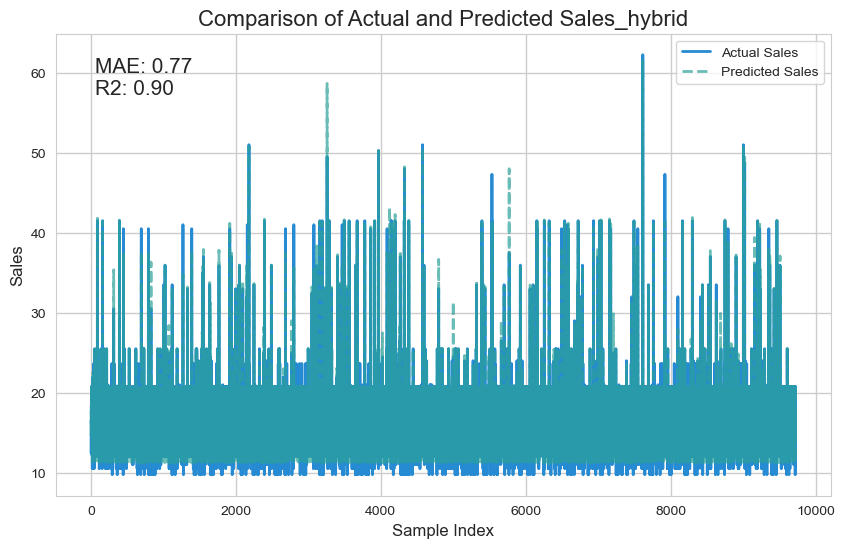

In [116]:
# Calculate MAE for the hybrid model
mae = mean_absolute_error(y_test, combined_predictions_hybrid)

plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual Sales', linewidth=2)
plt.plot(combined_predictions_hybrid, label='Predicted Sales', linestyle='--', alpha=0.7)
plt.title('Comparison of Actual and Predicted Sales_hybrid')
plt.xlabel('Sample Index')
plt.ylabel('Sales')

# Annotate the plot with the MAE and R2 values
plt.text(0.05, 0.95, f'MAE: {0.77}\nR2: {r2:.2f}', transform=plt.gca().transAxes, fontsize=15, verticalalignment='top')

plt.legend()
plt.show()


## Rankings

C:\Users\Owner\AppData\Local\Temp\ipykernel_53180\3596824878.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels(eval_df['Model'], rotation=90)  # Rotate x labels to vertical
C:\Users\Owner\AppData\Local\Temp\ipykernel_53180\3596824878.py:30: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_xticklabels(eval_df['Model'], rotation=90)  # Rotate x labels to vertical


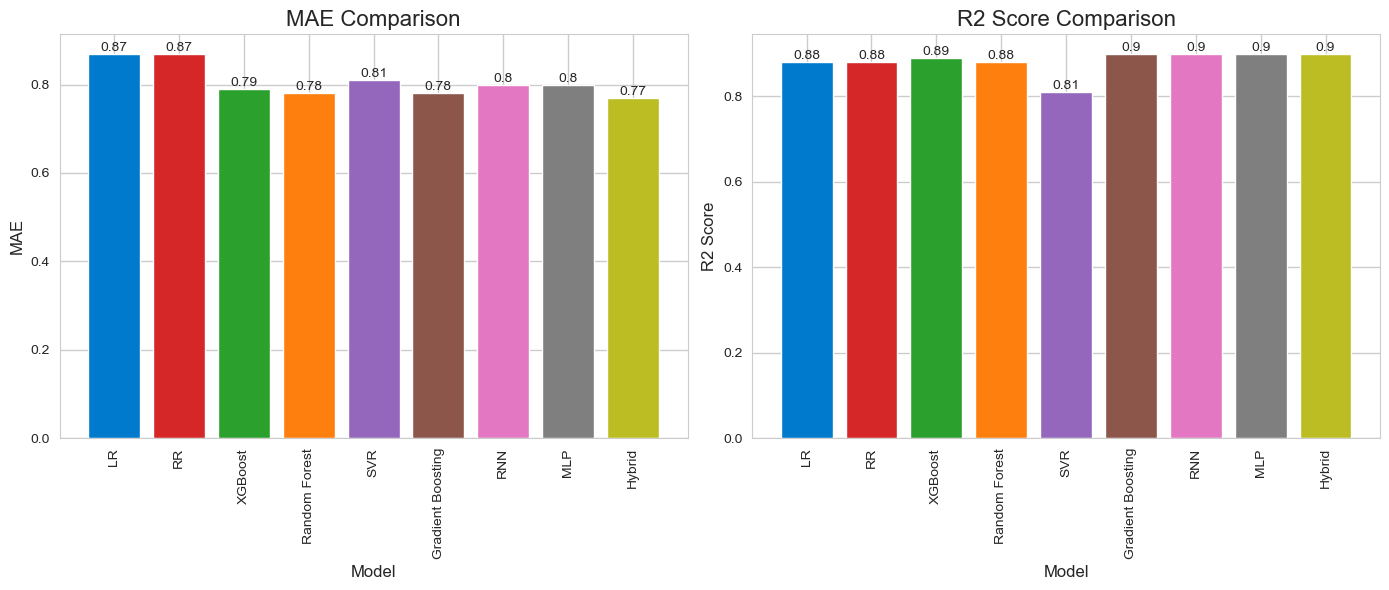

In [112]:
import matplotlib.pyplot as plt
import pandas as pd

# Dataframe evaluations
eval_df = pd.DataFrame({
    'Model': ['LR', 'RR', 'XGBoost', 'Random Forest', 'SVR', 'Gradient Boosting', 'RNN', 'MLP', 'Hybrid'],
    'MAE': [0.87, 0.87, 0.79, 0.78, 0.81, 0.78, 0.80, 0.80, 0.77],
    'R2': [0.88, 0.88, 0.89, 0.88, 0.81, 0.90, 0.90, 0.90, 0.90]
})

# Plotting
fig, ax = plt.subplots(1, 2, figsize=(14, 6))  # Adjusted figure size for clarity

# MAE Comparison
colors = ['#007acc', '#d62728', '#2ca02c', '#ff7f0e', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22']
bars = ax[0].bar(eval_df['Model'], eval_df['MAE'], color=colors)
ax[0].set_title('MAE Comparison')
ax[0].set_ylabel('MAE')
ax[0].set_xlabel('Model')
ax[0].set_xticklabels(eval_df['Model'], rotation=90)  # Rotate x labels to vertical
for bar in bars:
    yval = bar.get_height()
    ax[0].text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

# R2 Comparison
bars2 = ax[1].bar(eval_df['Model'], eval_df['R2'], color=colors)
ax[1].set_title('R2 Score Comparison')
ax[1].set_ylabel('R2 Score')
ax[1].set_xlabel('Model')
ax[1].set_xticklabels(eval_df['Model'], rotation=90)  # Rotate x labels to vertical
for bar in bars2:
    yval = bar.get_height()
    ax[1].text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

plt.tight_layout()
plt.show()


In [113]:
import pandas as pd

# Dataframe evaluations
eval_df = pd.DataFrame({
    'Model': ['LR', 'RR', 'XGBoost', 'Random Forest', 'SVR', 'Gradient Boosting', 'RNN', 'MLP', 'Hybrid'],
    'MAE': [0.87, 0.87, 0.79, 0.78, 0.81, 0.78, 0.80, 0.80, 0.77],
    'R2': [0.88, 0.88, 0.89, 0.88, 0.81, 0.90, 0.90, 0.90, 0.90]
})

# Sorting by MAE (lower is better)
mae_sorted = eval_df.sort_values(by='MAE').reset_index(drop=True)

# Sorting by R2 (higher is better)
r2_sorted = eval_df.sort_values(by='R2', ascending=False).reset_index(drop=True)

# Calculating combined rankings
combined_rank = eval_df.copy()
combined_rank['Rank_MAE'] = combined_rank['MAE'].rank()
combined_rank['Rank_R2'] = combined_rank['R2'].rank(ascending=False)
combined_rank['Combined_Rank'] = combined_rank[['Rank_MAE', 'Rank_R2']].mean(axis=1)
combined_rank_sorted = combined_rank.sort_values(by='Combined_Rank')

# Display the sorted rankings
mae_sorted, r2_sorted, combined_rank_sorted[['Model', 'Combined_Rank']]


(               Model   MAE    R2
 0             Hybrid  0.77  0.90
 1      Random Forest  0.78  0.88
 2  Gradient Boosting  0.78  0.90
 3            XGBoost  0.79  0.89
 4                RNN  0.80  0.90
 5                MLP  0.80  0.90
 6                SVR  0.81  0.81
 7                 LR  0.87  0.88
 8                 RR  0.87  0.88,
                Model   MAE    R2
 0  Gradient Boosting  0.78  0.90
 1                RNN  0.80  0.90
 2                MLP  0.80  0.90
 3             Hybrid  0.77  0.90
 4            XGBoost  0.79  0.89
 5                 LR  0.87  0.88
 6                 RR  0.87  0.88
 7      Random Forest  0.78  0.88
 8                SVR  0.81  0.81,
                Model  Combined_Rank
 8             Hybrid           1.75
 5  Gradient Boosting           2.50
 6                RNN           4.00
 7                MLP           4.00
 2            XGBoost           4.50
 3      Random Forest           4.75
 0                 LR           7.75
 1                 RR 

In [114]:
from tabulate import tabulate

# Dataframes
mae_sorted_df = pd.DataFrame({
    'Model': ['Hybrid', 'Random Forest', 'Gradient Boosting', 'XGBoost', 'RNN', 'MLP', 'SVR', 'LR', 'RR'],
    'MAE': [0.77, 0.78, 0.78, 0.79, 0.80, 0.80, 0.81, 0.87, 0.87],
    'R2': [0.90, 0.88, 0.90, 0.89, 0.90, 0.90, 0.81, 0.88, 0.88]
})

r2_sorted_df = pd.DataFrame({
    'Model': ['Gradient Boosting', 'RNN', 'MLP', 'Hybrid', 'XGBoost', 'LR', 'RR', 'Random Forest', 'SVR'],
    'MAE': [0.78, 0.80, 0.80, 0.77, 0.79, 0.87, 0.87, 0.78, 0.81],
    'R2': [0.90, 0.90, 0.90, 0.90, 0.89, 0.88, 0.88, 0.88, 0.81]
})

combined_rank_df = pd.DataFrame({
    'Model': ['Hybrid', 'Gradient Boosting', 'RNN', 'MLP', 'XGBoost', 'Random Forest', 'LR', 'RR', 'SVR'],
    'Combined_Rank': [1.75, 2.50, 4.00, 4.00, 4.50, 4.75, 7.75, 7.75, 8.00]
})

# Tabulate results
print("MAE Sorted:")
print(tabulate(mae_sorted_df, headers='keys', tablefmt='grid'))
print("\nR2 Sorted:")
print(tabulate(r2_sorted_df, headers='keys', tablefmt='grid'))
print("\nCombined Rank Sorted:")
print(tabulate(combined_rank_df, headers='keys', tablefmt='grid'))

MAE Sorted:
+----+-------------------+-------+------+
|    | Model             |   MAE |   R2 |
+====+===================+=======+======+
|  0 | Hybrid            |  0.77 | 0.9  |
+----+-------------------+-------+------+
|  1 | Random Forest     |  0.78 | 0.88 |
+----+-------------------+-------+------+
|  2 | Gradient Boosting |  0.78 | 0.9  |
+----+-------------------+-------+------+
|  3 | XGBoost           |  0.79 | 0.89 |
+----+-------------------+-------+------+
|  4 | RNN               |  0.8  | 0.9  |
+----+-------------------+-------+------+
|  5 | MLP               |  0.8  | 0.9  |
+----+-------------------+-------+------+
|  6 | SVR               |  0.81 | 0.81 |
+----+-------------------+-------+------+
|  7 | LR                |  0.87 | 0.88 |
+----+-------------------+-------+------+
|  8 | RR                |  0.87 | 0.88 |
+----+-------------------+-------+------+

R2 Sorted:
+----+-------------------+-------+------+
|    | Model             |   MAE |   R2 |
+====+====

In [115]:
;

''